Goal: using linear regression predict Close price based on the previous day values - Close, High, Low and Open using S&P 500 stocks price dataset

Step 1: preparing the data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'

# Loading the dataset
data = pd.read_csv('sp500_stocks.zip')
#display(data) 

#Filtering the data (olha = BAC)
rslt_df = data[data['Symbol'] == 'BAC']
#display(rslt_df)

#making sure that data is in ascending order
rslt_df.sort_values('Date')

#adding previous date values so we can use them as features
rslt_df['Close_prev'] = rslt_df.Close.shift(1)
rslt_df['High_prev'] = rslt_df.High.shift(1)
rslt_df['Low_prev'] = rslt_df.Low.shift(1)
rslt_df['Open_prev'] = rslt_df.Open.shift(1)
#display(rslt_df)

#cleaning the data
rslt_df = rslt_df.dropna(subset=["Close_prev"])
rslt_df = rslt_df[['Date','Close','Close_prev','High_prev',
                   'Low_prev','Open_prev']]
#display(rslt_df)


# Choosing features and target from the dataset
features = ['Close_prev', 'High_prev', 'Low_prev', 'Open_prev']
target = 'Close'
X = rslt_df[features]
y = rslt_df[target]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...,...
1830412,2024-06-12,ZTS,175.850006,175.850006,179.130005,174.800003,179.000000,2068300.0
1830413,2024-06-13,ZTS,171.320007,171.320007,176.500000,170.809998,175.869995,2298800.0
1830414,2024-06-14,ZTS,170.550003,170.550003,171.589996,168.889999,170.449997,2225300.0
1830415,2024-06-17,ZTS,170.899994,170.899994,171.619995,167.320007,168.300003,1798700.0


Step 2: Split dataset to train and test datasets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Step 3: Create and train the model

In [56]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# Creating linear regresion model
model = LinearRegression()
# Training the model
model.fit(X_train, y_train)

X = sm.add_constant(X_train) 
sr_model = sm.OLS(y_train, X).fit()
print(sr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.484e+05
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:52:29   Log-Likelihood:                -1890.9
No. Observations:                2910   AIC:                             3792.
Df Residuals:                    2905   BIC:                             3822.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.021      1.379      0.1

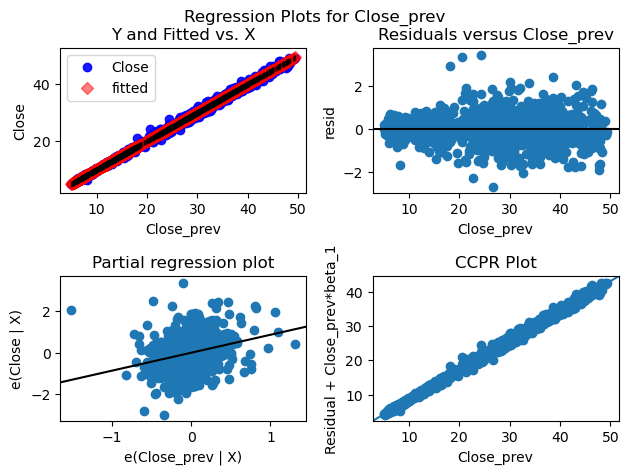

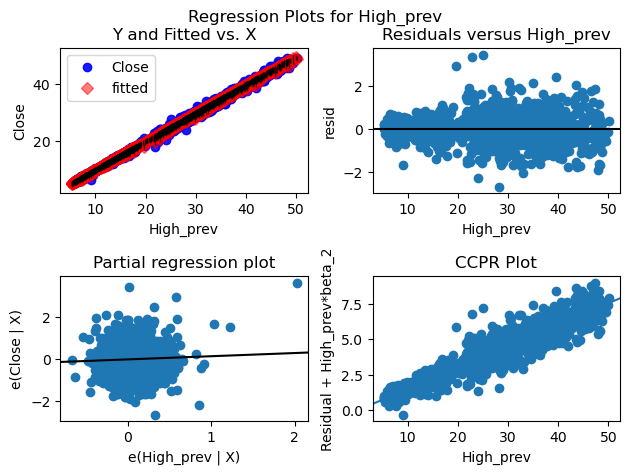

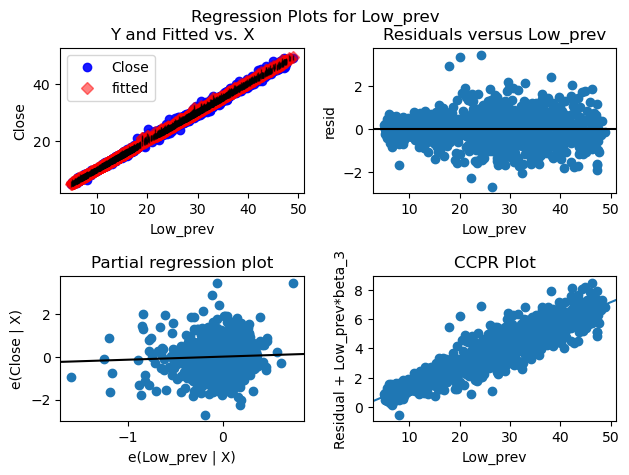

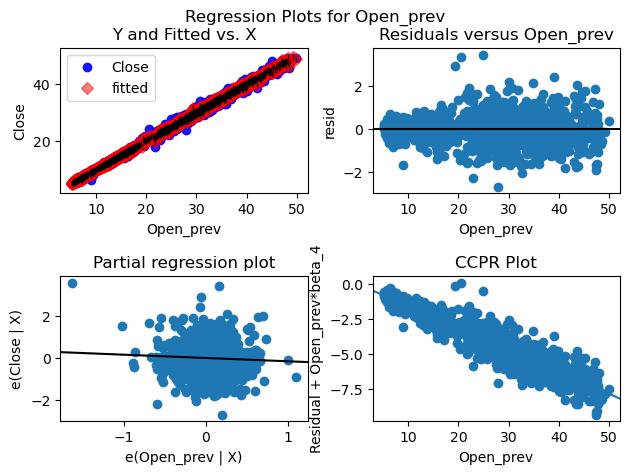

In [55]:
sm.graphics.plot_regress_exog(sr_model, 'Close_prev')
sm.graphics.plot_regress_exog(sr_model, 'High_prev')
sm.graphics.plot_regress_exog(sr_model, 'Low_prev')
sm.graphics.plot_regress_exog(sr_model, 'Open_prev')
plt.show()

Step 4: making prediction and model evaluation

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
# Making prediction
y_pred = model.predict(X_test)
dataset = pd.DataFrame(y_pred,y_test)
display(dataset)
# Evaluating the values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE : {mse}')
print(f'R² : {r2}')


,0
Close,
24.180000,24.518236
9.490000,9.699667
15.880000,15.852316
16.580000,16.509769
31.620001,32.066351
...,...
22.100000,21.985102
30.860001,31.161476
14.630000,14.551698


MSE : 0.20009241057652766
R² : 0.9982812984489762


Based on mean_squared_error MSE and R-squared values we can say that the prediction works good, we have MSE value close to zero and R-squared is 99% so the model is a good fit